# Weather Predicion Using RNN

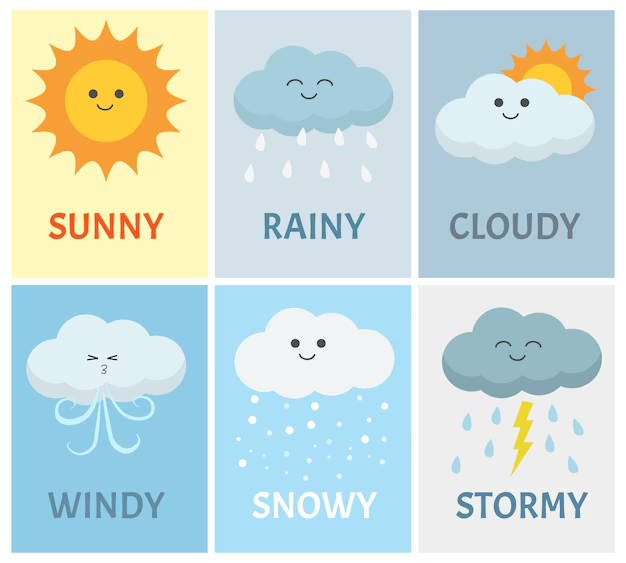

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
import warnings

warnings.filterwarnings("ignore")

In [29]:
df = pd.read_csv('seattle-weather.csv')


df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [30]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [31]:
df.duplicated().sum()

0

In [32]:
#Column Open converted into numpy array

training_set = df.iloc[:,2:3].values

training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [33]:
len(training_set)

1461

In [34]:
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    y_train.append(training_set[i,0])
    
 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

In [35]:
WINDOW = 10
X,y = df_to_XY(df,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

1451 1451


In [36]:
#Reshaping(To add new dimensions)

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [37]:
#Building the RNN

from keras.models import Sequential

from keras.layers import Dense, LSTM, Dropout

In [38]:
regressor = Sequential()

In [39]:
#Add info the first LSTM layer and some Dropout regularisation

regressor.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units=1))

In [55]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [57]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

from tensorflow.keras.losses import MeanSquaredError

from tensorflow.keras.metrics import RootMeanSquaredError

from tensorflow.keras.optimizers import Adam

In [59]:
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=30, batch_size=32)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 256.4225 - val_loss: 257.5514
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 105.3218 - val_loss: 159.1045
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 74.1952 - val_loss: 129.5205
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 61.8852 - val_loss: 111.9727
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 57.4387 - val_loss: 99.9481
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 59.1394 - val_loss: 91.4229
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 53.7947 - val_loss: 86.1068
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 56.5329 - val_loss: 81.6166
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 54.7009 - val_loss: 79.9936
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 52.2684 - val_loss: 78.2340
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 52.7839 - val_loss: 77.8880
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━

In [61]:
his = pd.DataFrame(history.history)

In [63]:
his.head()

,loss,val_loss
0,208.550842,257.551392
1,94.866814,159.104477
2,68.950272,129.520523
3,62.253227,111.972702
4,58.525990,99.948059


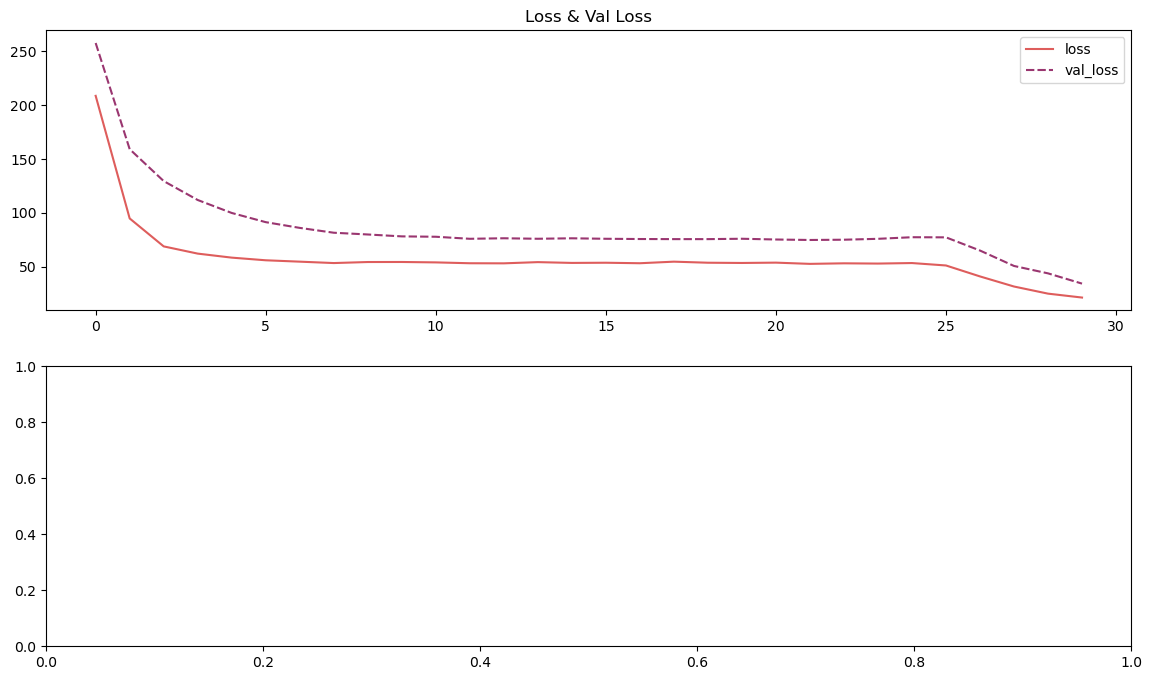

In [65]:
import seaborn as sns
his.columns
history_loss = his[['loss', 'val_loss']]


fig,axes = plt.subplots(2,1,figsize=(14,8))
plt.subplot(2,1,1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="flare");

In [67]:
train_pred = regressor.predict(X_train).flatten()

val_pred = regressor.predict(X_val).flatten()

test_pred = regressor.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


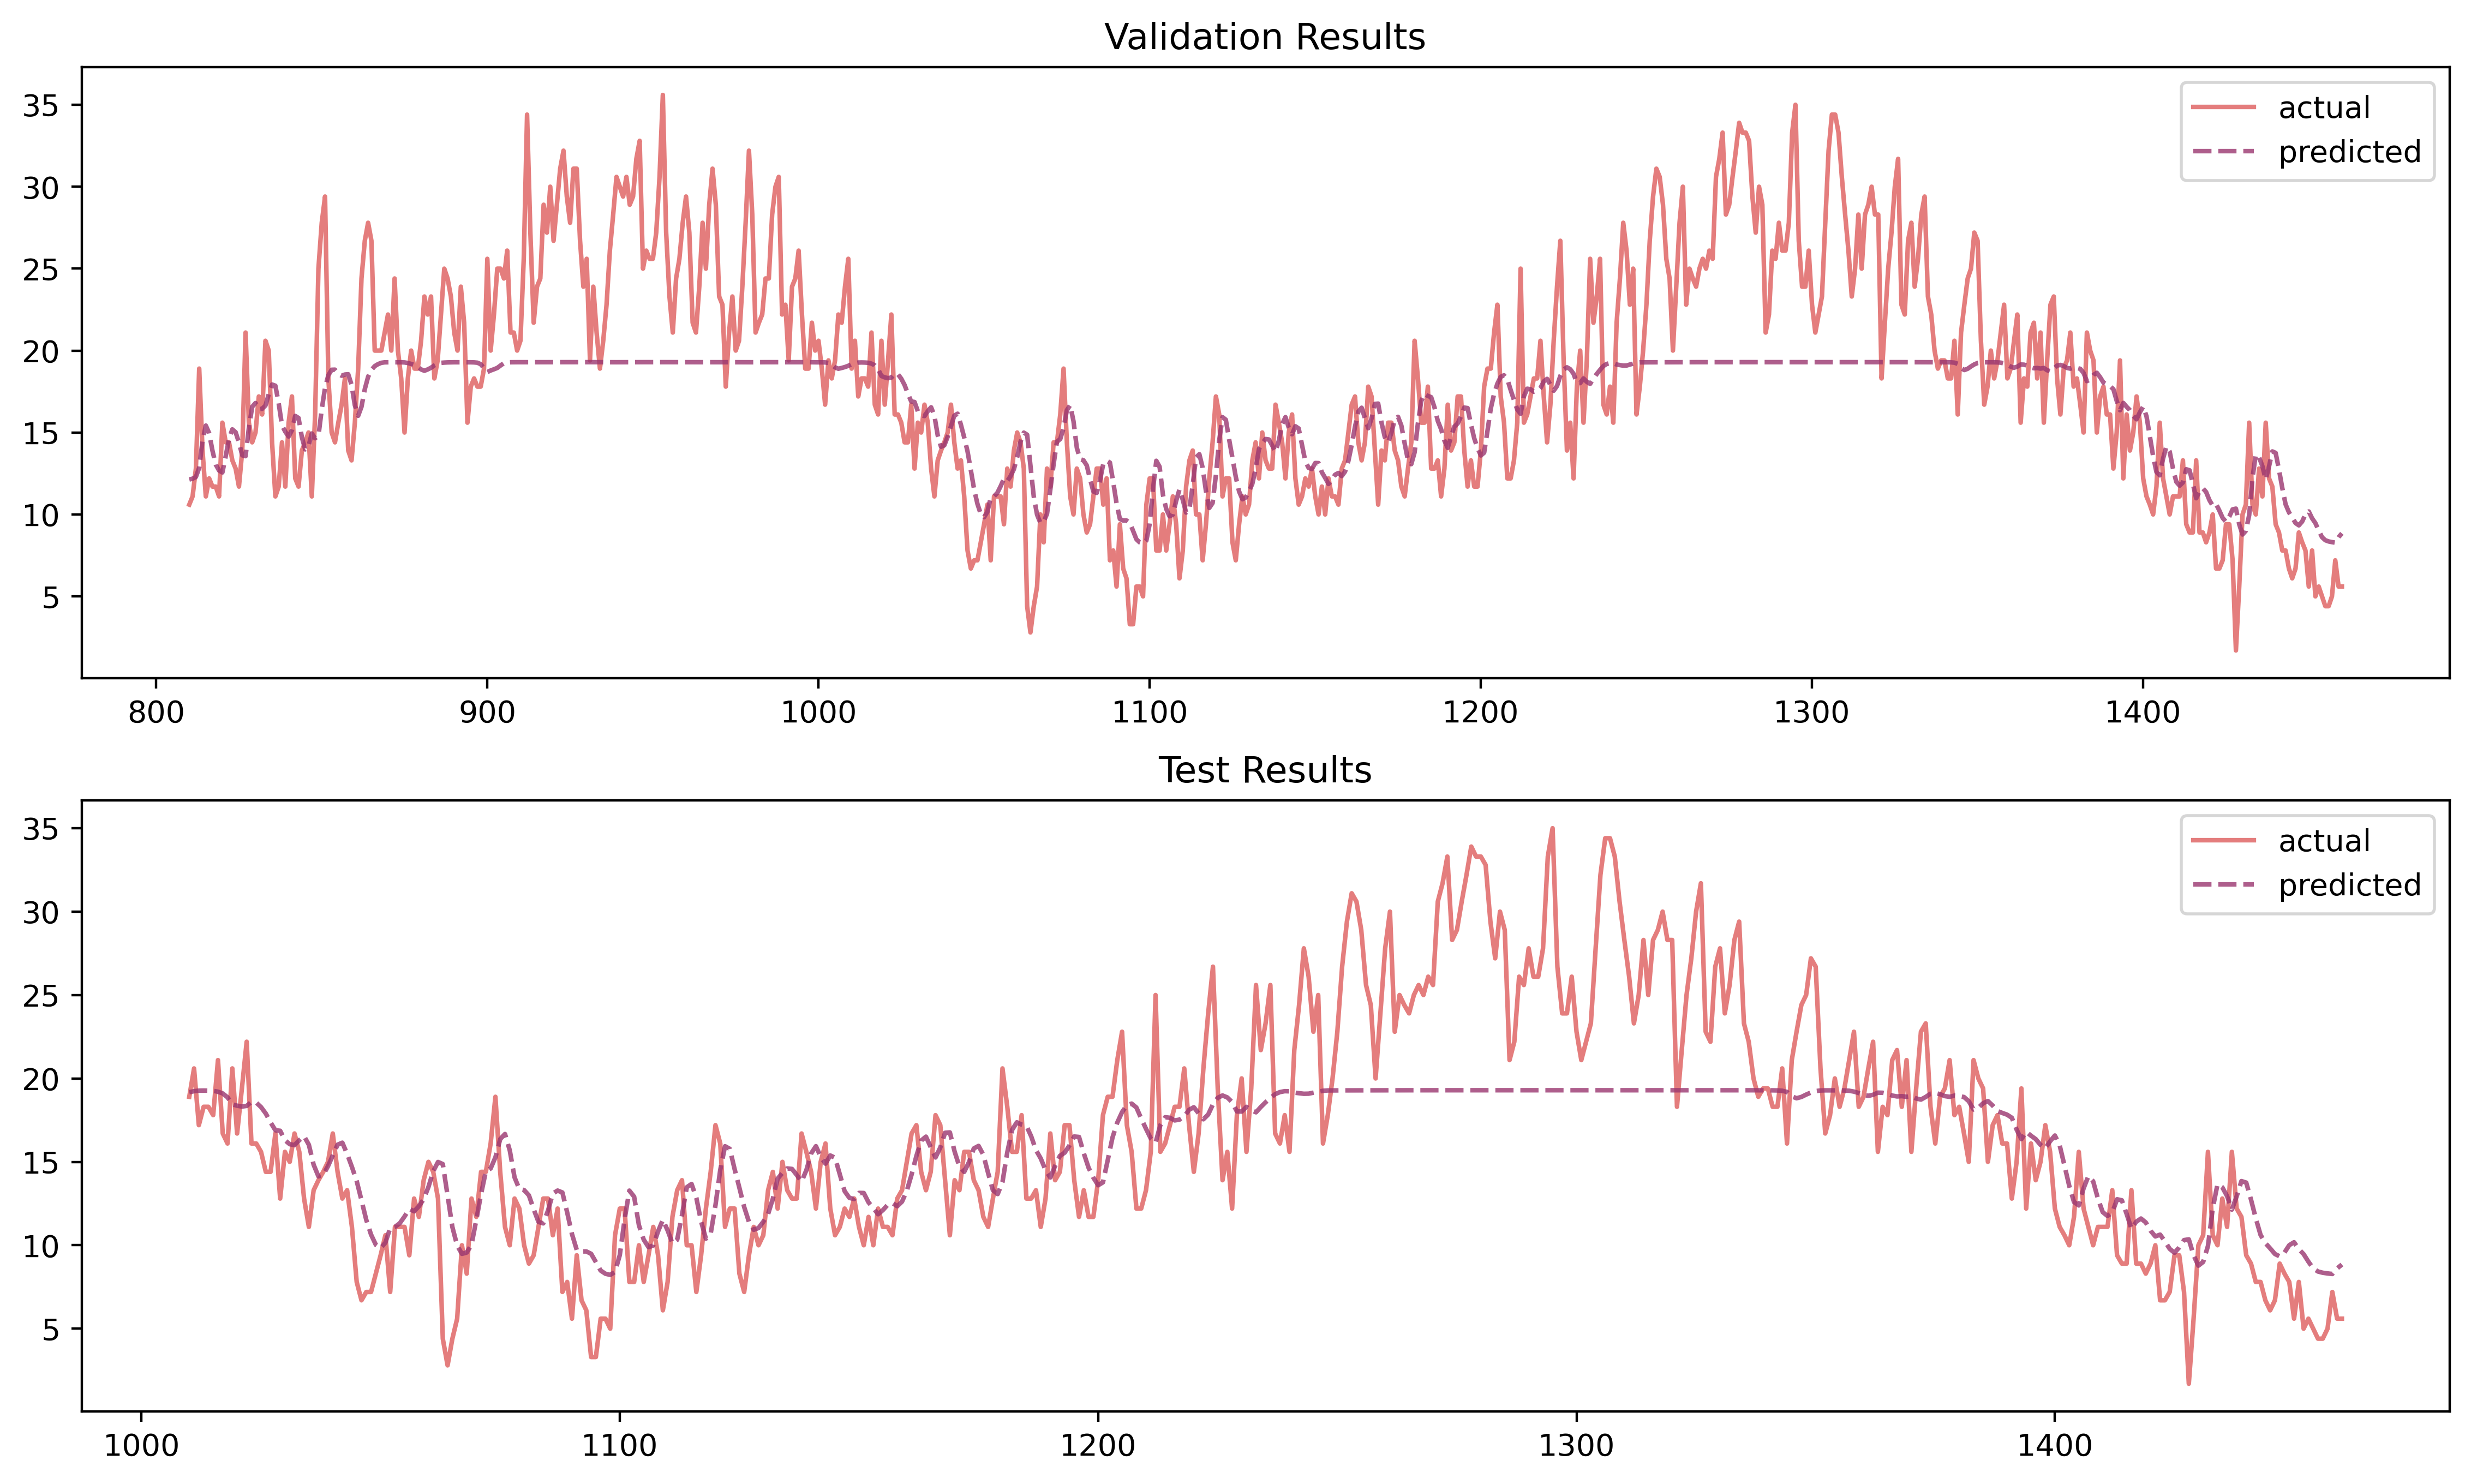

In [69]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:],alpha=0.8,palette="flare",linestyle=None);